# <font color='289C4E'>Exploration Numérique 1
**Élèves**: Sadegh ABDERRAHIM & Gabriel PEREIRA DE CARVALHO & Otávio RIBAS

### <font color='289C4E'>Table des matières<font><a class='anchor' id='top'></a>
- [Python Imports](#imports)
- [Exercice 1](#1)
- [Exercice 2](#2)
- [Exercice 3](#3)
- [Exercice 4](#4)
- [Exercice 5](#5)
- [Exercice 6](#6)
- [Exercice 7](#7)

<h2 align="center"> <font color='gray'>Python Imports</font></h2> <a class="anchor" id="imports"></a>

Dans cette section, on va importer tous les paquets qu'on ira utiliser plus tard.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats

<h2 align="center"> <font color='blue'>Exercice 1</font></h2> <a class="anchor" id="1"></a>

D'aprés ce qu'on a traité dans le PC on a que  :

$ \begin{equation} \hat{\beta} = (T^{T}T)^{-1}T^{T}X \end{equation}$ avec $\begin{equation}\hat{\beta} = \begin{pmatrix} \hat{\beta}_1 \\ \hat{\beta}_2 \end{pmatrix} \end{equation}$ et    $\begin{equation} T = \begin{bmatrix} \mathbf{1} & \mathbf{t} \end{bmatrix}\end{equation} $ .

comme $\begin{equation} T^T T = \begin{bmatrix} n & \sum_{i=1}^{n} T_i \\
    \sum_{i=1}^{n} T_i & \sum_{i=1}^{n} T_i^{2} \end{bmatrix} \end{equation}$
alors $   \begin{equation} (T^T T)^{-1} = \frac{1}{n\sum_{i=1}^{n} T_i^{2}-(\sum_{i=1}^{n} T_i)^{2}} \begin{bmatrix} \sum_{i=1}^{n} T_i^{2} & -\sum_{i=1}^{n} T_i \\  -\sum_{i=1}^{n} T_i & n \end{bmatrix} \end{equation}$ , ainsi d'aprés un simple calcul on obtient que :

$$\begin{align}
\begin{cases}
    \hat{\beta}_2 &=\frac{\sum_{i=1}^{n} (t_i -\bar{t})X_i}{\sum_{i=1}^{n} (t_i -\bar{t})^2}\\
    \hat{\beta}_1 &= \bar{X}-\hat{\beta}_2\bar{t}
\end{cases}
\end{align}$$

<h2 align="center"> <font color='blue'>Exercice 2</font></h2> <a class="anchor" id="2"></a>

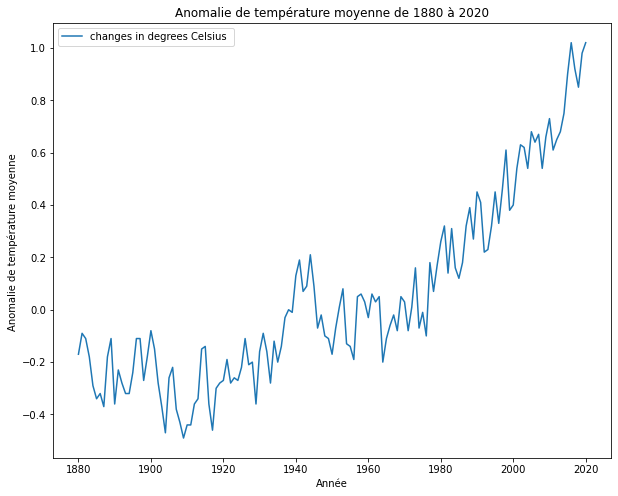

In [2]:
# charger les données 
url= "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
data=pd.read_csv(url, skiprows=1) # pour qu'il saute la première ligne qui contient juste 

# Convertir la colonne "year" en datetime pour qu'elle soit reconnue comme une année
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Filtrer les données pour la période de 1880 à 2020
data = data[(data['Year'].dt.year >= 1880) & (data['Year'].dt.year <= 2020)]

# Convertir la colonne 'J-D' en type numérique (float)
data['J-D'] = data['J-D'].str.replace(',', '').astype(float)

# traçons la courbe de la valeur moyenne des annomalies de température de 1880 à 2020 
plt.figure(figsize=(10, 8))
plt.plot(data['Year'], data['J-D'], label='changes in degrees Celsius ' )
plt.xlabel('Année')
plt.ylabel('Anomalie de température moyenne ')
plt.title('Anomalie de température moyenne de 1880 à 2020')
plt.legend()
plt.show()

<h2 align="center"> <font color='blue'>Exercice 3</font></h2> <a class="anchor" id="3"></a>

In [3]:
liste_beta_1=[]
liste_beta_2=[]
liste_std=[]
liste_std_1=[]
liste_std_2=[]

for j in range(0,10):
    t=np.array([ i for i in range(1880+j*10,1921+j*10)])

    #Variables auxiliares pour construir liste d'observation X1 ,.....,X40
    debut_annee = pd.to_datetime(str(1880+j*10), format='%Y')
    fin_annee = pd.to_datetime(str(1920+j*10), format='%Y')
    periode = (data['Year'] >= debut_annee) & (data['Year'] <= fin_annee)
    T = data.loc[periode, 'Year']

    # Construction de la liste d'observation X1, ..., X40
    obs = []
    for annee in T:
        # on utilise la méthode loc pour accéder à la valeur de 'J-D' pour 'Year' égal à annee
        valeur = data.loc[data['Year'] == annee, 'J-D'].values[0]
        obs.append(valeur)
    X = np.array(obs)

    # calcul du beta 2 
    s1=0
    s2=0
    for i in range(40):
        s1+= (t[i]-np.mean(t))*X[i]
        s2+= (t[i]-np.mean(t))**2

    
    beta_2= s1/s2
    
    #calcul du beta 1 
    beta_1= np.mean(X)-beta_2*np.mean(t)
    
    #calcul du standard deviation 
    std= (1/40) * np.sum([(X[i]-beta_1-beta_2*t[i])**2 for i in range(40)])
    
    #calcul du std_1et std_2
    std_1=std*(np.sum([i**2 for i in t])/(40*(np.sum([(i-np.mean(t))**2 for i in t]))))
    std_2=std/(np.sum([(i-np.mean(t))**2 for i in t]))
                                          
    
    liste_beta_1.append(beta_1)
    liste_beta_2.append(beta_2)
    liste_std.append(std)
    liste_std_1.append(std_1)
    liste_std_2.append(std_2)                                     

    
# affichons les valeurs pour chaque intervalle 
print(liste_beta_1)
print(liste_beta_2)
print(liste_std)

[5.418493651228648, -2.1617918151091566, -13.98896958070704, -23.691290307846895, -14.08147437654152, -3.223531104412166, 0.653797387412077, -17.95677719923267, -26.7092408879145, -32.602798940348954]
[-0.00299625468164794, 0.0009868913857677872, 0.007161048689138576, 0.012192883895131084, 0.0072134831460674165, 0.0016348314606741564, -0.0003295880149812737, 0.009146067415730338, 0.01357303370786517, 0.01654681647940075]
[0.011439117120850571, 0.011629145653837675, 0.01169039227363772, 0.010503011956444253, 0.01281626674531613, 0.012094041883342573, 0.011340572008814089, 0.01055548963297662, 0.009915304854654448, 0.008436581323093405]


<h2 align="center"> <font color='blue'>Exercice 4</font></h2> <a class="anchor" id="4"></a>

On a : 

$$ \frac{\hat{\sigma}_{n}^2 \cdot (n - 2)}{\sigma^{2}} \sim \chi^2_{(n-2)} $$

et donc  en notant $q_{\frac{\alpha}{2}}^{n-2}  $  et   $q_{1-\frac{\alpha}{2}}^{n-2} $ les quantiles d’ordre $\frac{\alpha}{2}$ et $1 - \frac{\alpha}{2}$ d’une loi $\chi^2_{(n-2)}$  ,  nous avons que : 
$$ \lbrack n\frac{\hat{\sigma}^{2}}{q_{1-\frac{\alpha}{2}}^{n-2}} ; n\frac{\hat{\sigma}^{2}}{q_{\frac{\alpha}{2}}^{n-2}} \rbrack $$ 


est un intervalle de confiance de niveau $1 - \alpha$ pour l’estimation de $\sigma^{2}$. dans notre cas on prend $n=40$ et $\alpha = 0.05$

In [4]:
#calculons la valeur des quantiles 
quantile_1= quantile = stats.chi2.ppf(1 - (0.05/2), 40-2)
quantile_2= quantile = stats.chi2.ppf((0.05/2), 40-2)

# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for j in range(0,10):
    borne_1= (40*liste_std[j])/quantile_1
    borne_2= (40*liste_std[j])/quantile_2
    print(f"[{borne_1} ; {borne_2}]")

[0.008042191731985228 ; 0.019999783126320395]
[0.008175789970440587 ; 0.020332022879389056]
[0.008218848980516648 ; 0.02043910449244365]
[0.00738406950682373 ; 0.018363127073780322]
[0.009010387197297498 ; 0.02240754707617991]
[0.008502632031209469 ; 0.021144832440486608]
[0.00797291027635586 ; 0.019827490033412363]
[0.0074209635723240415 ; 0.018454877349481886]
[0.006970886116452819 ; 0.01733559894784044]
[0.005931279822210422 ; 0.014750246457559405]


Pour j=1,2 on a que $$\frac{\hat{\beta_{j}}-\beta_{j}}{\hat{\sigma_{j}}} \sim t_{n-2} $$

et donc de meme en notant $q_{\frac{\alpha}{2}}^{n-2}  $  et   $q_{1-\frac{\alpha}{2}}^{n-2} $ les quantiles d’ordre α/2 et 1 − α/2 d’une loi $t_{n-2}$  ,  nous avons que : 
$$ \lbrack  \beta_{j}-q_{1-\frac{\alpha}{2}}\hat{\sigma_{j}}  ; \beta_{j}-q_{\frac{\alpha}{2}}\hat{\sigma_{j}} \rbrack $$ 


est un intervalle de confiance de niveau 1 − α pour l’estimation de $\beta_{j}$ . dans notre cas on prend n=40 et α=0.05 





Pour $\beta_{2}$ :

In [5]:
# calculons la valeur des quantiles
quantile_a= quantile = stats.t.ppf(1 - (0.05/2), 40-2)
quantile_b= quantile = stats.t.ppf((0.05/2), 40-2)

# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for i in range(0,10):
    borne_a= liste_beta_2[i]-quantile_a*liste_std_2[i] 
    borne_b= liste_beta_2[i]-quantile_b*liste_std_2[i]
    print(f"[{borne_a} ; {borne_b}]")

[-0.0030002890513251773 ; -0.002992220311970703]
[0.0009827899964645428 ; 0.0009909927750710317]
[0.007156925699260467 ; 0.007165171679016685]
[0.012189179672811383 ; 0.012196588117450785]
[0.007208963080629985 ; 0.007218003211504848]
[0.0016305661108806432 ; 0.0016390968104676696]
[-0.00033358762958015655 ; -0.0003255884003823909]
[0.009142344685483434 ; 0.009149790145977242]
[0.013569536759208767 ; 0.013576530656521571]
[0.016543841049784125 ; 0.016549791909017376]


Et pour $\beta_{1}$ :

In [6]:
# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for i in range(0,10):
    borne_c= liste_beta_1[i]-quantile_a*liste_std_1[i] 
    borne_d= liste_beta_1[i]-quantile_b*liste_std_1[i]
    print(f"[{borne_c} ; {borne_d}]")

[-9.51026167901692 ; 20.34724898147422]
[-17.498715639569504 ; 13.175132009351191]
[-29.568525863582618 ; 1.5905867021685403]
[-37.83462602537364 ; -9.547954590320149]
[-31.5191342432566 ; 3.3561854901735675]
[-19.84861058668748 ; 13.401548377863152]
[-15.0958189864278 ; 16.403413761251958]
[-32.76604382161464 ; -3.1475105768506957]
[-40.761916150418 ; -12.656565625410991]
[-44.680799709920024 ; -20.52479817077788]


<h2 align="center"> <font color='blue'>Exercice 5</font></h2> <a class="anchor" id="5"></a>

Alors, il nous faut calculer les intervalles de confiance de prédiction de niveau de couverture $0.95$. L'intervalle est donné par:
$$ \left[ \hat{X}_i \pm q_{1-\frac{\alpha}{2}}^{n-2} \hat{\sigma}\sqrt{\frac{1}{n} + \frac{(X_i - \bar{X})^2}{\sum (X_l - \bar{X})^2}} \right] $$


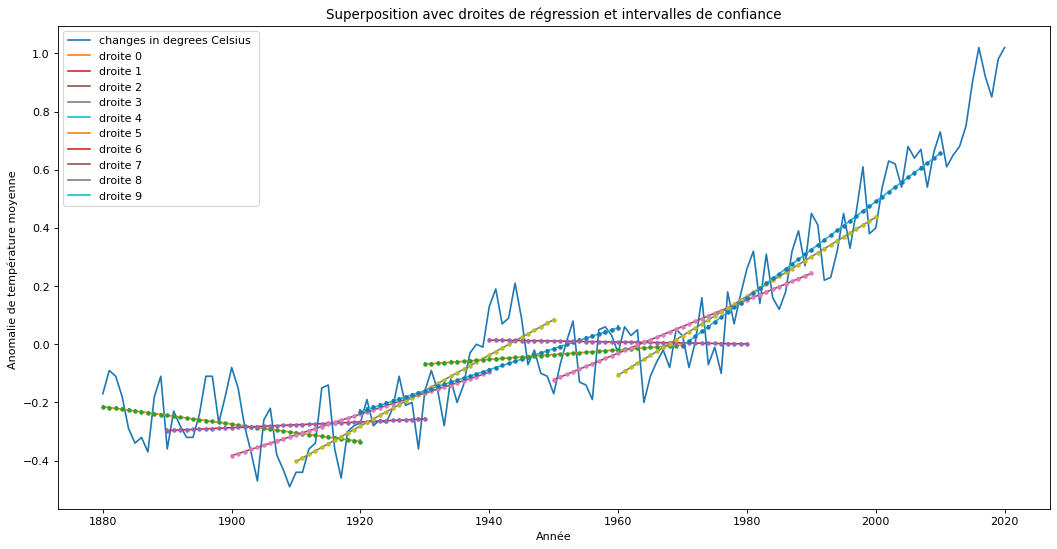

In [7]:
plt.figure(figsize=(16, 8), dpi=80)

#visualisons le graphe des observations
plt.plot(data['Year'], data['J-D'], label='changes in degrees Celsius ' )
#les droites de regression
for j in range(0, 10):
    
    t = np.array([ i for i in range(1880+j*10,1921+j*10)])
    debut_annee = pd.to_datetime(str(1880+j*10), format='%Y')
    fin_annee = pd.to_datetime(str(1920+j*10), format='%Y')
    periode = (data['Year'] >= debut_annee) & (data['Year'] <= fin_annee)
    T = data.loc[periode, 'Year']
    
    prediction = liste_beta_1[j] + liste_beta_2[j]*t
    plt.plot(T, prediction, label='droite {}'.format(j))
    #et les intervalles de confiance
    intervalles_confiance = []
    quantile = stats.t.ppf(1 - (0.05/2), 40-2)
    xm = np.mean(prediction)
    aux_sum = 0
    for xi in prediction:
        aux_sum += (xi - xm)**2
    for xi in prediction:
        err = quantile*liste_std[j]*np.sqrt(1.0/40 + ((xi - xm)**2)/aux_sum)
        intervalles_confiance.append(err)
    plt.errorbar(T, prediction, yerr = intervalles_confiance, fmt='.')

plt.xlabel('Année')
plt.ylabel('Anomalie de température moyenne ')
plt.title('Superposition avec droites de régression et intervalles de confiance')

plt.legend()
plt.show()

<h2 align="center"> <font color='blue'>Exercice 6</font></h2> <a class="anchor" id="6"></a>

Alors, on veut visualiser pour chaque intervalle les résidues standardisés
$$ t_i = \frac{\hat{X}_i - X_i}{\hat{\sigma}\sqrt{1 - h_{ii}}} $$
où $H = (h_{ij})$ est la matrice qui satisfait $\hat{X} = HX$. Cette matrice est donnée par $H = T(T^TT)^{-1}T^T$. On a $h_{ii} = \frac{nt_i^2 - 2t_i\sum t_i + \sum t_i^2}{n\sum_{i=1}^{n} T_i^{2}-(\sum_{i=1}^{n} T_i)^{2}}$

In [8]:
for j in range(0, 10):
    
    t = np.array([ i for i in range(1880+j*10,1921+j*10)])
    debut_annee = pd.to_datetime(str(1880+j*10), format='%Y')
    fin_annee = pd.to_datetime(str(1920+j*10), format='%Y')
    periode = (data['Year'] >= debut_annee) & (data['Year'] <= fin_annee)
    T = data.loc[periode, 'Year']
    
    obs = []
    for annee in T:
        # on utilise la méthode loc pour accéder à la valeur de 'J-D' pour 'Year' égal à annee
        valeur = data.loc[data['Year'] == annee, 'J-D'].values[0]
        obs.append(valeur)
    
    prediction = liste_beta_1[j] + liste_beta_2[j]*t
    #alors on calcule le residue pour chaque prevision
    residues = []
    for i in range(40):
        sum_t = np.sum(t)
        sum_sq_t = np.sum(np.square(t))
        hii = (40*(t[i]**2) - 2*t[i]*sum_t + sum_sq_t)/(40*sum_sq_t - sum_t**2)
        residue = (xi - obs[i])/(liste_std[j]*np.sqrt(1 - hii))
        residues.append(residue)    
    print(residues)

[73.10879001923051, 66.03185166216323, 67.80266658359879, 73.99762306197043, 83.73212026738842, 88.15783492566851, 86.3896195345378, 90.81548372333799, 74.00398475502594, 67.81082745430034, 89.93501796806709, 78.43224611641521, 82.85822300886294, 86.39934798604223, 86.40064216566884, 79.3219805113474, 67.81806940342096, 67.81902890059725, 81.98043448596033, 74.01617916523549, 65.16663612481375, 71.3629367728308, 82.86983176211231, 90.83664726948717, 99.68873188521579, 81.10265068484547, 77.56312210270966, 91.72606067802468, 96.15277047240735, 101.46469855252674, 97.03998227062327, 97.04097865784038, 89.96054671198013, 88.1910529600692, 71.37323465642383, 70.48868808994837, 89.96389226357802, 98.81682342855946, 84.65407685410734, 82.88429780731882]
[88.45025838354753, 77.13759241888746, 81.49072677908718, 84.97363385715548, 84.97513195736005, 78.01346706281709, 66.69950433902588, 66.70062547149674, 80.6287101254475, 72.79596658988002, 64.0924860718889, 70.18683991706605, 81.504313654135

<h2 align="center"> <font color='blue'>Exercice 7</font></h2> <a class="anchor" id="7"></a>